# Setup

Development setting. Makes sure all files are re-imported every time a cell runs.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os
sys.path.append(os.path.abspath(".."))  # add parent directory (project root)

Import modules, components, functions etc

In [3]:
import random
import torch
from torchvision.transforms import v2
import torch.nn as nn
import matplotlib.pyplot as plt
from time import time
from PIL import Image

from src.utils.basics import displayImage, measureAccuracy, loadModel
from src.utils.data import loadData, extractDataFromLoader
from src.config import Config
from src.cnn import ConvolutionalNeuralNetwork, LayerType, ActivationFunction
from src.logger import Logger
from src.train import runExperiment
from src.test import testModel
from src.architectures.small import SmallArchitecture
from src.architectures.medium import MediumArchitecture
from src.architectures.mediumRegularized import MediumRegularizedArchitecture
from src.architectures.doubleBarrelRegularized import DoubleBarrelRegularizedArchitecture

# Load data for Experiment #A

In [ ]:
import torch
import numpy as np
import torchvision
from src.utils.data import loadData, extractDataFromLoader
from src.config import Config
from torchvision.transforms import v2
from src.utils.basics import displayImage
from PIL import Image

dataAugmentationTechniques = [
    v2.RandomHorizontalFlip(0.5),
    v2.ColorJitter(brightness=0.25, contrast=0.15, saturation=0.15, hue=0.05),
    v2.RandomAffine(degrees=0, translate=(0.25, 0.25))
]

dataAugmentationTechniques = []

trainLoader, validationLoader, testLoader = loadData(Config.DATASET_PATH, batchSize=Config.BATCH_SIZE, dataAugmentationTechniques=dataAugmentationTechniques)

# Combine all batches of the validation set into single tensors
validationImages, validationLabels, _, _ = extractDataFromLoader(validationLoader)

val = np.transpose(validationImages[1], (1, 2, 0))

basicTransformations: list[any] = [
    torchvision.transforms.Resize((Config.IMAGE_SIZE, Config.IMAGE_SIZE)), # Resize images to 128x128 pixels
    torchvision.transforms.ToTensor() # Convert images to PyTorch tensors and rescale pixel values to [0, 1]
]

otherTransforms = torchvision.transforms.Compose(
        basicTransformations
    )

img = Image.open("C:/Users/dimos/Desktop/Dimosthenis/Programming/Dogs-VS-Cats/data/MyOwnImages/Dog/Jasper___Θεσσαλονίκη.jpg")
# img = np.array(img)
img = otherTransforms(img)
displayImage(img)

# for i in range(5):
#     displayImage(validationImages[i])

### DoubleBarrel with regularization

In [ ]:
experimentId = 9
runExperiment(
    experimentId=experimentId,
    model=ConvolutionalNeuralNetwork(
        architecture=DoubleBarrelRegularizedArchitecture(),
        epochs=70,
        learningRate=0.001,
        batchSize=Config.BATCH_SIZE,
        weightDecay=0.0001,
    ),
    trainLoader=trainLoader,
    validationImages=validationImages,
    validationLabels=validationLabels,
    earlyStopping=Config.EARLY_STOPPING,
    description="""Transformation B: RandomHorizontalFlip, ColorJitter, RandomAffine (translate). Applies data augmentation
        transformations before basic transformations!!
    """
)

### DoubleBarrel with regularization

In [ ]:
# experimentId = 10
# runExperiment(
#     experimentId=experimentId,
#     model=ConvolutionalNeuralNetwork(
#         architecture=DoubleBarrelRegularizedArchitecture(),
#         epochs=70,
#         learningRate=0.001,
#         batchSize=Config.BATCH_SIZE,
#         weightDecay=0.0001,
#     ),
#     trainLoader=trainLoader,
#     validationImages=validationImages,
#     validationLabels=validationLabels,
#     earlyStopping=Config.EARLY_STOPPING,
#     description="""Transformation C: RandomHorizontalFlip, RandomRotation. Applies data augmentation
#         transformations before basic transformations!!
#     """
# )

# Model testing

ola kala
Accuracy on test set: 0.7857


C:\Users\dimos\Desktop\Dimosthenis\Programming\Dogs-VS-Cats\src\utils\basics.py:267: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


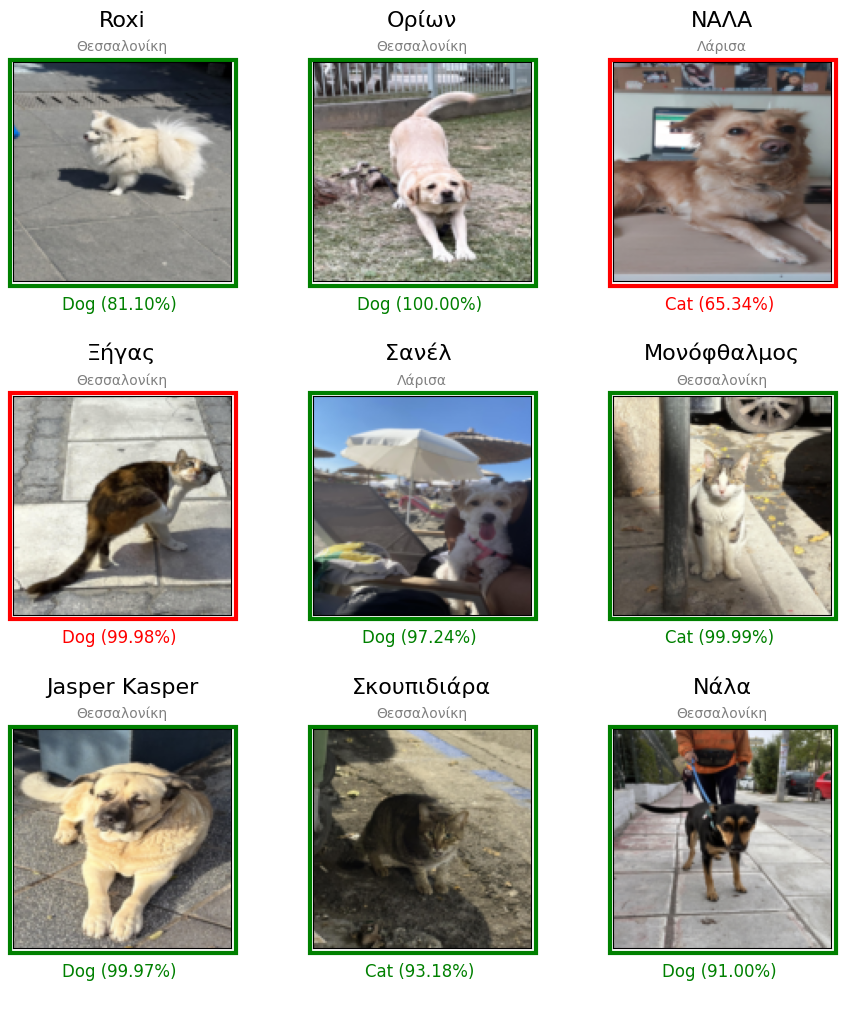

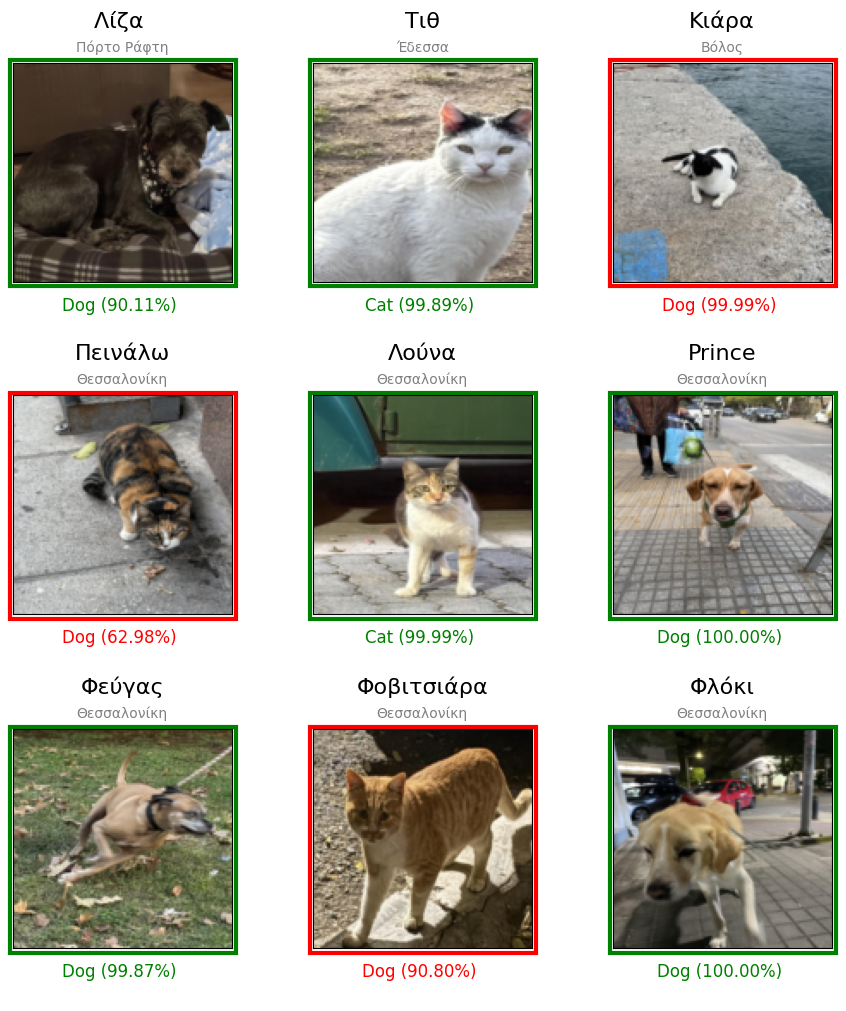

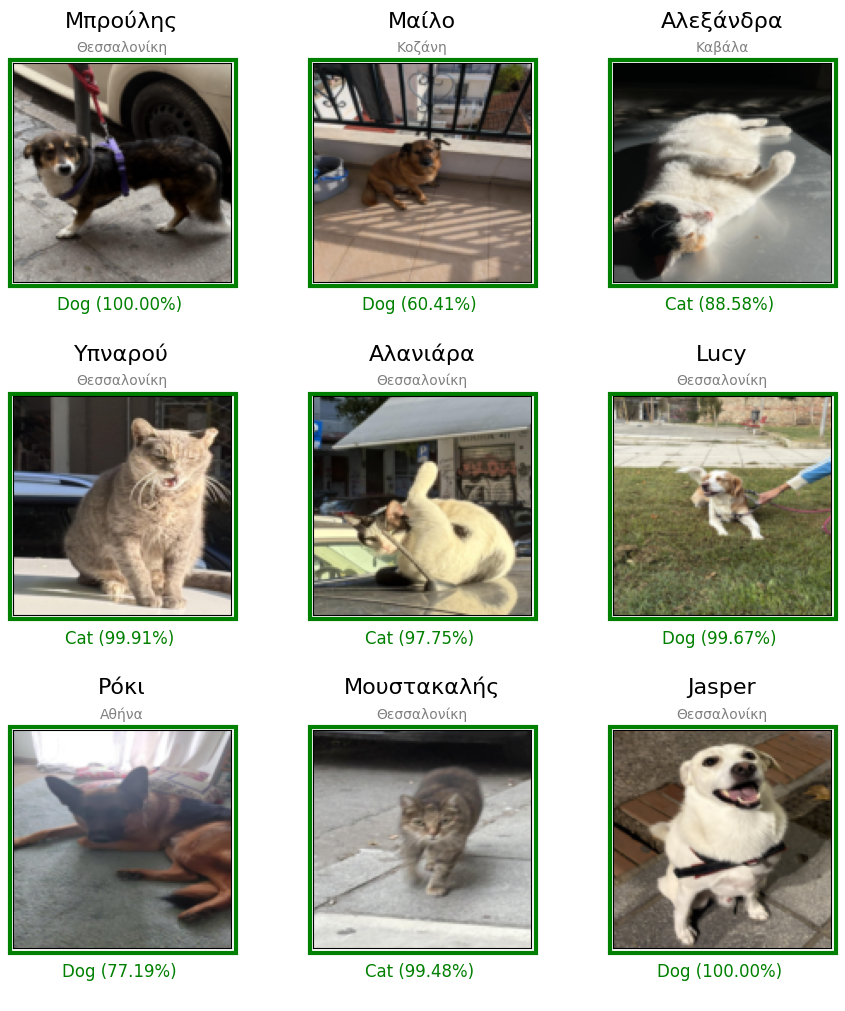

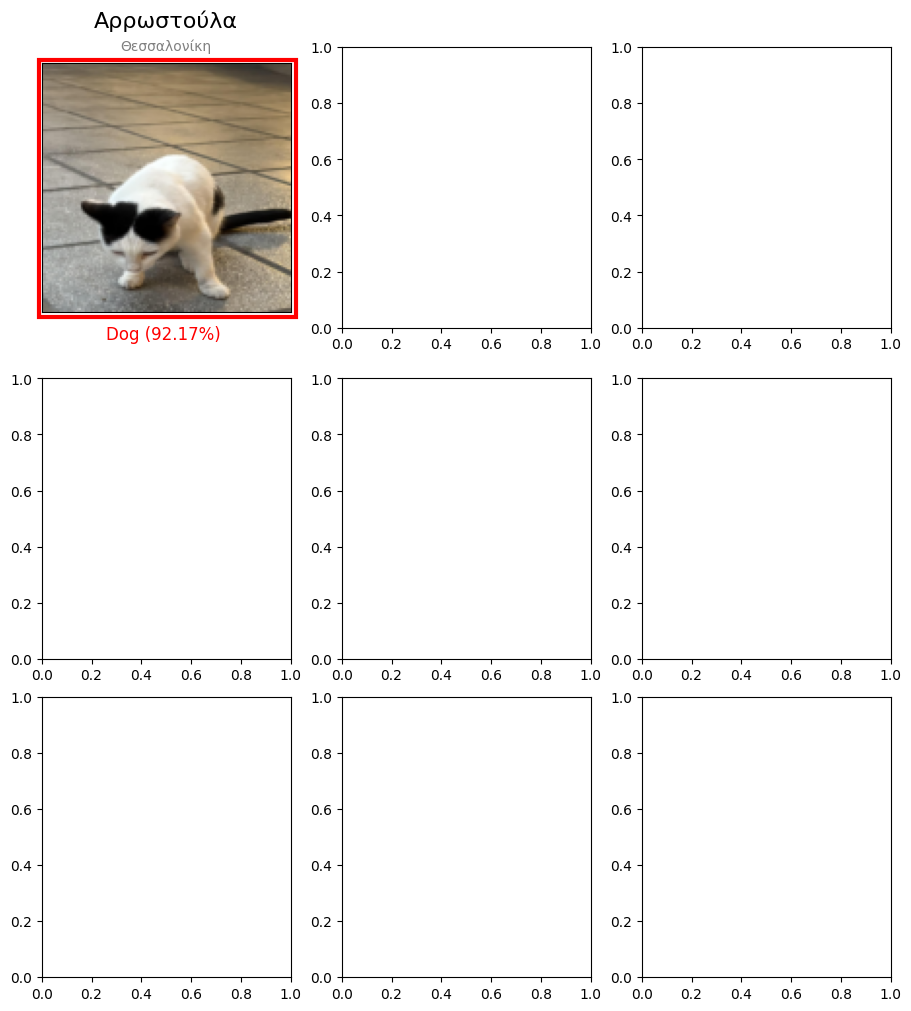

In [4]:
trainLoader, validationLoader, testLoader = loadData(Config.DATASET_PATH, batchSize=Config.BATCH_SIZE, dataAugmentationTechniques=[])

model=ConvolutionalNeuralNetwork(
    architecture=DoubleBarrelRegularizedArchitecture()
)

print('ola kala')

# loadModel(model, "experiments\experiment_10 2025-10-08 23.37\model.pth")
loadModel(model, "experiments/experiment_04 2025-09-20 21.31/model.pth")

testModel(
    model,
    testLoader=testLoader
)

# Playground

In [ ]:
# from src.utils.basics import imageAugmentation
# import torchvision
# from torchvision.transforms import v2
# from src.config import Config

# img = torchvision.io.decode_image("C:/Users/dimos/Desktop/Δημοσθένης/7.jpg").float() / 255


# transforms = torchvision.transforms.Compose({
#     # v2.RandomResizedCrop(size=Config.IMAGE_SIZE, scale=(0.6, 0.9)),
#     # v2.ColorJitter(0.25, 0.15, 0.15, 0.05),
#     v2.RandomHorizontalFlip(0.5),
#     # v2.RandomRotation(30),
#     # v2.GaussianBlur(kernel_size=(7, 13), sigma=(6, 7))
#     # v2.RandomAffine(degrees=0, scale=(0.8, 1.3))
#     v2.ColorJitter(brightness=(0.75, 1.25), contrast=(0.85, 1.15), saturation=(0.85, 1.15), hue=(-0.05, 0.05)),
#     v2.RandomAffine(degrees=0, translate=(0.25, 0.25)),
#     v2.Resize((Config.IMAGE_SIZE, Config.IMAGE_SIZE)),
#     v2.ToTensor()
# })

# imageAugmentation(img, transforms, times=4)
